# 01 : Stock Price Trends Prediction on Baseline techniques

การทำนายแนวโน้มราคาหลักทรัพย์ผ่านเทคนิควิธีการพื้นฐาน

### คำอธิบาย

*   เป็นโปรแกรมที่สร้างวิธีการทำนายแนวโน้มราคาหลักทรัพย์แบบรายวันผ่านเทคนิควิธีการพื้นฐาน
*   ตัวแปรที่ใช้ คือ ตัวชี้วัดทางเทคนิค (Technical Indicators)
*   วิธีการทำนายผล ได้แก่ วิธีจำแนกแบบเบย์อย่างง่าย (Naive Bayes Classifier) วิธีจำแนกต้นไม้การตัดสินใจ (Decision Tree Classifier) และวิธีจำแนกโครงข่ายประสาทเทียมเพอร์เซฟตรอนแบบหลายชั้น (MLP Neural Network)
*   วัดประสิทธิภาพของโมเดลเพื่อศึกษาเปรียบเทียบกับเทคนิควิธีการทำเหมืองข้อมูล

### ขั้นตอนการศึกษา

*   1) กำหนดชุดข้อมูลและค่าพารามิเตอร์ที่ต้องการศึกษา
*   2) ดึงตัวแปรอินดิเคเตอร์ผ่านไลบรารี่และสร้างชุดข้อมูลใหม่
*   3) คัดเลือกตัวแปรที่มีความสำคัญต่อโมเดลในการทำนายผล
*   4) กำหนดค่าไฮเปอร์พารามิเตอร์บนโมเดลทำนายผลและทำการเทรนโมเดลทั้งหมด
*   5) เลือกค่าไฮเปอร์พารามิเตอร์ที่ดีที่สุดและทำการเทรนโมเดล
*   6) เปรียบเทียบประสิทธิภาพของโมเดลในการทำนายแนวโน้ม



# 1) Data Collection

1.1) ทำการติดตั้ง Library ที่จำเป็นทั้งหมดในการใช้งาน

In [1]:
# ignore all warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Stock data collection library
# Import from yahoo financial 

!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 110 kB 44.6 MB/s 
     |████████████████████████████████| 4.0 MB 54.8 MB/s 
     |████████████████████████████████| 112 kB 61.4 MB/s 
     |████████████████████████████████| 128 kB 63.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
# Import similarity distance measure algorithm  
# Dynamic Time Warping (DTW) algorithm  

!pip install dtaidistance
from dtaidistance import dtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 4.6 MB/s 


In [4]:
# Libraries for processing and mining stock data.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [5]:
# Libraries for predictive modeling.

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [6]:
# Libraries for evaluation metrics.

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

1.2) กำหนดชุดข้อมูลและค่าที่เกี่ยวข้องที่ต้องการใช้ศึกษา



*   1) **stock_price** : ชื่อหลักทรัพย์ (ตัวย่อภาษาอังกฤษ) 
*   2) **start_date** : วันที่เริ่มต้นขอชุดข้อมูล (YYYY-MM-DD)
*   3) **end_date** : วันที่สิ้นสุดของชุดข้อมูล (YYYY-MM-DD)
*   4) **interval** : ช่วงกรอบเวลา (Timeframe) หน่วย d เท่ากับ วัน 

In [7]:
# Setting parameters for modeling and evaluating.

# Stock data  
stock_price = 'KBANK.BK'    

# Start Date  
start_date = '2017-11-10'   

# End Date
end_date = '2022-11-11'

# Timeframe of Stock data 
interval = '1d'       

1.3) ดึงชุดข้อมูล

In [8]:
# Import stock data from SET (Thailand)

df = yf.download(tickers=stock_price, start=start_date, end=end_date, interval=interval)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-10,218.0,220.0,217.0,217.0,190.248169,3365200
2017-11-13,216.0,219.0,215.0,217.0,190.248169,3414400
2017-11-14,218.0,224.0,217.0,224.0,196.385193,4853400
2017-11-15,223.0,223.0,220.0,220.0,192.878311,3879500
2017-11-16,220.0,223.0,220.0,221.0,193.755020,3443400
...,...,...,...,...,...,...
2022-11-04,149.0,149.5,148.0,148.5,148.500000,12164700
2022-11-07,149.0,149.5,148.0,148.0,148.000000,5119300
2022-11-08,149.0,149.5,148.0,148.5,148.500000,5572100


1.4) สำรวจชุดข้อมูลในเบื้องต้น

In [9]:
# Check data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1214 entries, 2017-11-10 to 2022-11-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1214 non-null   float64
 1   High       1214 non-null   float64
 2   Low        1214 non-null   float64
 3   Close      1214 non-null   float64
 4   Adj Close  1214 non-null   float64
 5   Volume     1214 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 66.4 KB


In [10]:
# Check "close price" column in our dataset (target feature).
df['Close']

Date
2017-11-10    217.0
2017-11-13    217.0
2017-11-14    224.0
2017-11-15    220.0
2017-11-16    221.0
              ...  
2022-11-04    148.5
2022-11-07    148.0
2022-11-08    148.5
2022-11-09    147.5
2022-11-10    148.0
Name: Close, Length: 1214, dtype: float64

1.5) พล็อตกราฟเพื่อดูกราฟการเคลื่อนที่ของราคาปิดย้อนหลังจนถึงช่วงเวลาปัจจุบันที่ได้ทำการจัดเก็บ

Text(0, 0.5, 'Close price')

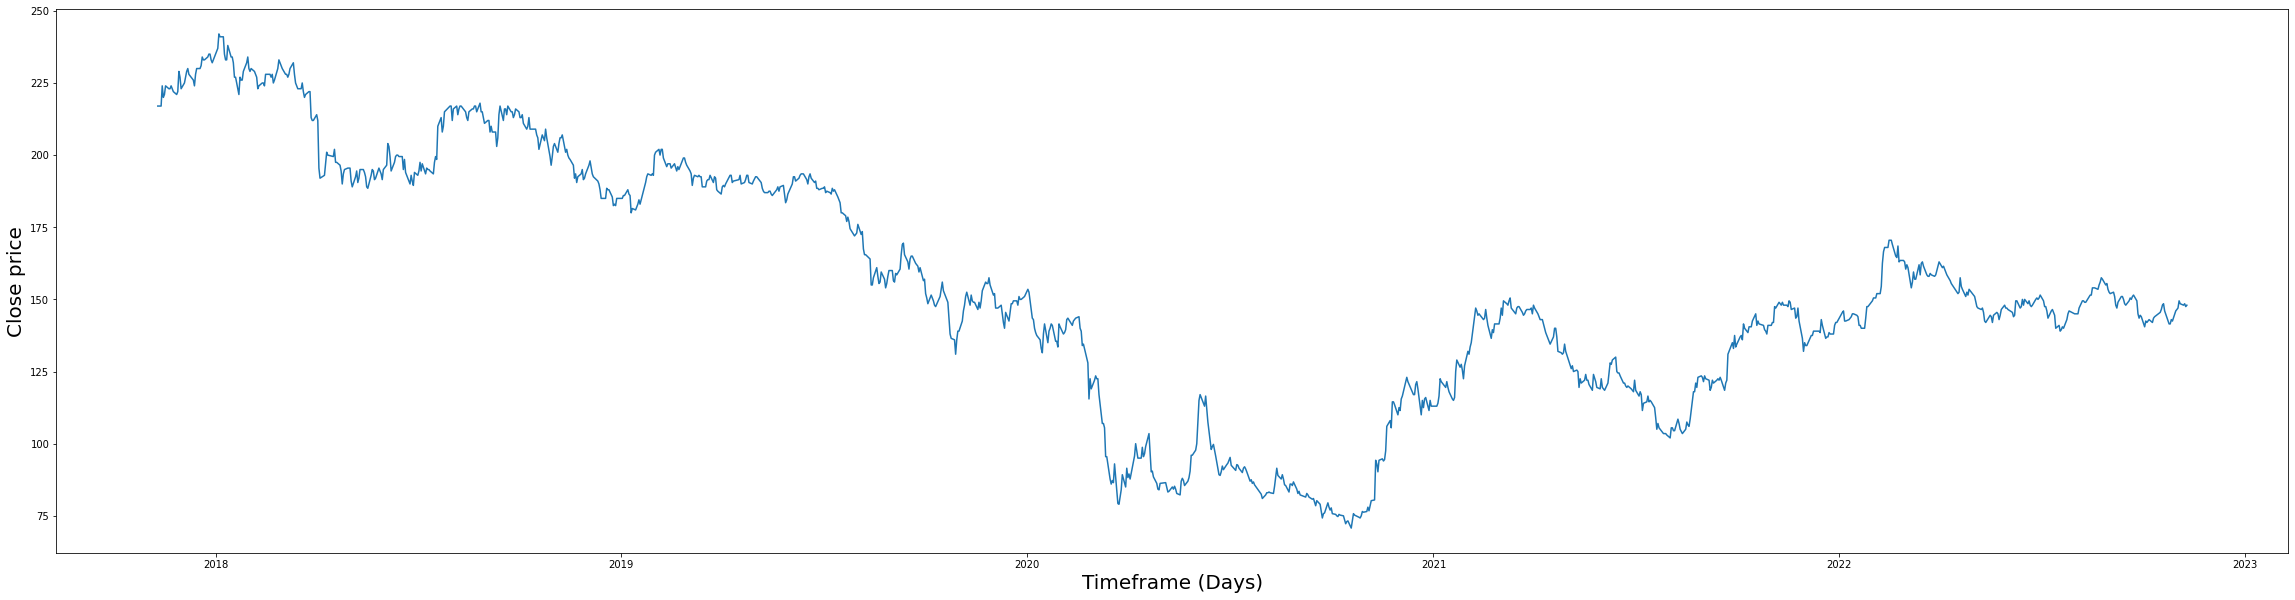

In [11]:
# Plot stock close price (Lineplot) from start to current date.

plt.figure(figsize=(40,10))
plt.plot(df['Close'])
plt.xlabel('Timeframe (Days)', fontsize=20)
plt.ylabel('Close price', fontsize=20)

# 2) Baseline techniques

แบ่งชุดข้อมูลสำหรับฝึกสอนและทดสอบ

In [67]:
# Split data into training set and test set.
# Training set = 0.85 (85%)
# Test set = 0.15 (15%)

n = len(df) * 0.15
n = round(n)
print("Test data =",n)

Test data = 182


## Data Preprocessing

ติดตั้งไลบรารี่สำหรับคำนวณตัวชี้วัดทางเทคนิค (Technical Indicators)

In [13]:
# TA library
# Source : https://handsoffinvesting.com/get-40-technical-indicators-for-a-stock-using-python/

In [14]:
# Install TA library 
# Technical Indicators computed from a raw stock data.

!pip install ta
from ta import add_all_ta_features
from ta.utils import dropna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=bc1fd3aa832f467a6f3a732973c5ebe2609c82c26943cd8feca497a28ed25735
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


2.1) ดึงชุดข้อมูล

In [15]:
# Dataset.
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-10,218.0,220.0,217.0,217.0,190.248169,3365200
2017-11-13,216.0,219.0,215.0,217.0,190.248169,3414400
2017-11-14,218.0,224.0,217.0,224.0,196.385193,4853400
2017-11-15,223.0,223.0,220.0,220.0,192.878311,3879500
2017-11-16,220.0,223.0,220.0,221.0,193.755020,3443400
...,...,...,...,...,...,...
2022-11-04,149.0,149.5,148.0,148.5,148.500000,12164700
2022-11-07,149.0,149.5,148.0,148.0,148.000000,5119300
2022-11-08,149.0,149.5,148.0,148.5,148.500000,5572100


2.1) สร้างชุดข้อมูลที่ประกอบด้วยฟีเจอร์ทั้งหมดจากการคำนวณตัวชี้วัดทางเทคนิค

In [16]:
# Generate a dataset that contained all technical indicators calculated from TA library.

df2 = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")
df2

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-10,218.0,220.0,217.0,217.0,190.248169,3365200,-3.365200e+06,3365200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.123987,NaN,0.000000
2017-11-13,216.0,219.0,215.0,217.0,190.248169,3414400,-3.365200e+06,6779600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2017-11-14,218.0,224.0,217.0,224.0,196.385193,4853400,1.488200e+06,11633000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.225806,3.174870,3.225806
2017-11-15,223.0,223.0,220.0,220.0,192.878311,3879500,-2.391300e+06,7753500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.785714,-1.801851,1.382488
2017-11-16,220.0,223.0,220.0,221.0,193.755020,3443400,-3.539100e+06,11196900,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454545,0.453516,1.843318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,149.0,149.5,148.0,148.5,148.500000,12164700,-4.799854e+08,1361994300,0.082938,-2.860770e+04,...,0.109766,-0.391934,0.501699,-0.824106,1.045138,-1.869244,146.148963,-0.668896,-0.671143,-31.566820
2022-11-07,149.0,149.5,148.0,148.0,148.000000,5119300,-4.851047e+08,1356875000,0.098139,-3.901852e+05,...,0.203826,-0.272782,0.476608,-6.079231,-0.379736,-5.699495,146.187775,-0.336700,-0.337268,-31.797235
2022-11-08,149.0,149.5,148.0,148.5,148.500000,5572100,-4.869621e+08,1362447100,0.159589,6.356271e+04,...,0.302218,-0.157782,0.460000,-10.274336,-2.358656,-7.915680,146.651233,0.337838,0.337268,-31.566820


2.3) สร้างคลาสแนวโน้มราคาในวันถัดไปบนชุดข้อมูล

In [17]:
# Generate a Target column in dataset
# 1st class = Up trend (+1)
# 2nd class = Down trend (-1)

list_of_trend = []
for i in range(df2.shape[0]-1) :
  if df2.iloc[i,3] > df2.iloc[i+1,3] : list_of_trend.append('-1')
  else : list_of_trend.append('+1')

In [18]:
# Drop a current row (Because it has no trend of next day)

df2 = df2.drop(df2.index[df2.shape[0]-1])

In [19]:
# Adding target column to dataset.

df2['Movement'] = list_of_trend
df2

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Movement
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-10,218.0,220.0,217.0,217.0,190.248169,3365200,-3.365200e+06,3365200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.123987,NaN,0.000000,+1
2017-11-13,216.0,219.0,215.0,217.0,190.248169,3414400,-3.365200e+06,6779600,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,+1
2017-11-14,218.0,224.0,217.0,224.0,196.385193,4853400,1.488200e+06,11633000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.225806,3.174870,3.225806,-1
2017-11-15,223.0,223.0,220.0,220.0,192.878311,3879500,-2.391300e+06,7753500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.785714,-1.801851,1.382488,+1
2017-11-16,220.0,223.0,220.0,221.0,193.755020,3443400,-3.539100e+06,11196900,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.454545,0.453516,1.843318,+1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-03,147.0,149.5,146.5,149.5,149.500000,14693000,-4.759305e+08,1374159000,0.099403,1.994074e+06,...,-0.517359,0.470261,0.459078,1.512449,-1.053371,146.139136,1.700680,1.686381,-31.105991,-1
2022-11-04,149.0,149.5,148.0,148.5,148.500000,12164700,-4.799854e+08,1361994300,0.082938,-2.860770e+04,...,-0.391934,0.501699,-0.824106,1.045138,-1.869244,146.148963,-0.668896,-0.671143,-31.566820,-1
2022-11-07,149.0,149.5,148.0,148.0,148.000000,5119300,-4.851047e+08,1356875000,0.098139,-3.901852e+05,...,-0.272782,0.476608,-6.079231,-0.379736,-5.699495,146.187775,-0.336700,-0.337268,-31.797235,+1


ทำการดร็อปคอลัมน์ที่ไม่ใช่ตัวแปรที่เป็นตัวชี้วัดทางเทคนิค

In [20]:
# drop all columns that are not contain indicators. 

df2 = df2.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
df2

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Movement
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-10,-3.365200e+06,3365200,NaN,NaN,NaN,NaN,1.398288e+06,NaN,NaN,1000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,40.123987,NaN,0.000000,+1
2017-11-13,-3.365200e+06,6779600,NaN,NaN,-175.726336,NaN,1.350252e+06,NaN,NaN,1000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,+1
2017-11-14,1.488200e+06,11633000,NaN,NaN,504.800758,NaN,1.565613e+05,NaN,NaN,1000.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.225806,3.174870,3.225806,-1
2017-11-15,-2.391300e+06,7753500,NaN,NaN,77.329553,NaN,8.728450e+04,NaN,NaN,982.142857,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.785714,-1.801851,1.382488,+1
2017-11-16,-3.539100e+06,11196900,NaN,NaN,0.000000,NaN,-5.362497e+04,NaN,NaN,986.607143,...,NaN,NaN,NaN,NaN,NaN,NaN,0.454545,0.453516,1.843318,+1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-03,-4.759305e+08,1374159000,0.099403,1.994074e+06,30.626829,11.665991,2.827397e+05,144.576736,61.092136,883.935603,...,-0.517359,0.470261,0.459078,1.512449,-1.053371,146.139136,1.700680,1.686381,-31.105991,-1
2022-11-04,-4.799854e+08,1361994300,0.082938,-2.860770e+04,9.248070,9.559306,1.685117e+05,144.826979,61.971244,878.022990,...,-0.391934,0.501699,-0.824106,1.045138,-1.869244,146.148963,-0.668896,-0.671143,-31.566820,-1
2022-11-07,-4.851047e+08,1356875000,0.098139,-3.901852e+05,0.000000,9.267107,-9.860593e+04,144.918590,58.108171,875.066684,...,-0.272782,0.476608,-6.079231,-0.379736,-5.699495,146.187775,-0.336700,-0.337268,-31.797235,+1


ตรวจเช็คชุดข้อมูล

In [21]:
# Check data information

df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1213 entries, 2017-11-10 to 2022-11-09
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   volume_adi                 1213 non-null   float64
 1   volume_obv                 1213 non-null   int64  
 2   volume_cmf                 1194 non-null   float64
 3   volume_fi                  1200 non-null   float64
 4   volume_em                  1212 non-null   float64
 5   volume_sma_em              1199 non-null   float64
 6   volume_vpt                 1213 non-null   float64
 7   volume_vwap                1200 non-null   float64
 8   volume_mfi                 1200 non-null   float64
 9   volume_nvi                 1213 non-null   float64
 10  volatility_bbm             1194 non-null   float64
 11  volatility_bbh             1194 non-null   float64
 12  volatility_bbl             1194 non-null   float64
 13  volatility_bbw             119

หลังจากเช็คข้อมูลแล้ว ทำการดร็อปคอลัมน์ที่ค่า Null มากกว่า 50% ออก

In [22]:
# Drop indicator columns that contain less 50% of data.

df2 = df2.drop(["trend_psar_up", "trend_psar_down"], axis=1)

ดร็อปค่า Null ในทุกคอลัมน์ทั้งหมด

In [23]:
# drop all rows that contain NaN values.

df2 = df2.dropna()

In [24]:
# Check dataset after cleaning data.

df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1142 entries, 2018-02-23 to 2022-11-09
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   volume_adi                 1142 non-null   float64
 1   volume_obv                 1142 non-null   int64  
 2   volume_cmf                 1142 non-null   float64
 3   volume_fi                  1142 non-null   float64
 4   volume_em                  1142 non-null   float64
 5   volume_sma_em              1142 non-null   float64
 6   volume_vpt                 1142 non-null   float64
 7   volume_vwap                1142 non-null   float64
 8   volume_mfi                 1142 non-null   float64
 9   volume_nvi                 1142 non-null   float64
 10  volatility_bbm             1142 non-null   float64
 11  volatility_bbh             1142 non-null   float64
 12  volatility_bbl             1142 non-null   float64
 13  volatility_bbw             114

ตรวจเช็คสัดส่วนของคลาสแนวโน้มในชุดข้อมูลทดสอบ

In [25]:
# Checking Target class proportion on Test data.

df2_target_count = df2.iloc[-n:,:]
counts = df2_target_count.groupby('Movement').size()
counts

Movement
+1    99
-1    83
dtype: int64

## Feature Selection

ทำการคัดเลือกฟีเจอร์ที่มีความสำคัญกับโมเดลในการจำแนกคลาสแนวโน้มราคา โดยคำนวณหาค่า Feature Importance ของแต่ละฟีเจอร์ผ่านการเทรนโมเดลต้นไม้การตัดสินใจ 

In [26]:
# Define variables for building a model.
# X = Features 
# y = Target class 

X = df2.drop(["Movement"], axis=1)
y = df2["Movement"]

In [27]:
# Import decision tree model 
# fit model with features and target class 

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X,y)

DecisionTreeClassifier(random_state=0)

In [28]:
# Finding feature importance

importance = dtree.feature_importances_

In [29]:
# Create a dictionary of features and importance values

feature_dict= {}
for col, val in sorted(zip(X.columns, importance),key=lambda x:x[1], reverse=True):
  feature_dict[col] = val

จะได้ฟีเจอร์ที่มีค่าความสำคัญสูงที่สุดเรียงตามลำดับ

In [30]:
# Create a dataframe of most 10 importance features value.

df_feature = pd.DataFrame({'Feature':feature_dict.keys(),'Importance':feature_dict.values()})
df_feature = df_feature.iloc[:10,:]
df_feature

,Feature,Importance
0,momentum_pvo_hist,0.042464
1,trend_adx_pos,0.042118
2,trend_mass_index,0.037304
3,trend_vortex_ind_pos,0.034240
4,trend_kst_diff,0.034226
5,momentum_pvo,0.031726
6,volume_obv,0.029740
7,momentum_stoch_signal,0.029112
8,volume_sma_em,0.029025
9,volume_mfi,0.028502


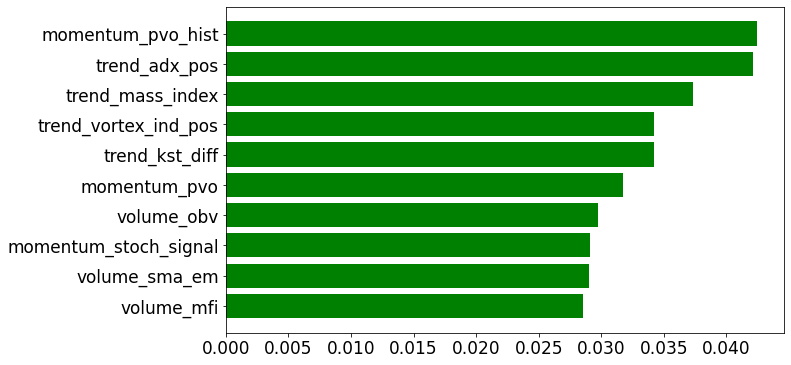

In [31]:
# Plot bar chart of most 10 importance features.

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 17})
df_feature_plot = df_feature.copy().sort_values(by='Importance', ascending=True)
plt.barh(df_feature_plot['Feature'], df_feature_plot['Importance'], color='green')
plt.style.use('ggplot')

In [32]:
# Create list of columns.

important_features_list = list(feature_dict)
important_features_columns_list = important_features_list[:10]

In [33]:
# Create dataset contains features after selection by Importance value. 

df3 = df2.loc[:,important_features_columns_list].copy()
df3['Movement'] = df2['Movement']
df3 = df3.reset_index()
df3

,Date,momentum_pvo_hist,trend_adx_pos,trend_mass_index,trend_vortex_ind_pos,trend_kst_diff,momentum_pvo,volume_obv,momentum_stoch_signal,volume_sma_em,volume_mfi,Movement
0,2018-02-23,-5.284977,16.790713,23.608842,0.920000,1.296949,-27.027471,55511800,58.888889,-21.896184,38.768808,+1
1,2018-02-26,-2.583704,20.729879,23.639655,1.000000,2.244873,-24.972125,59893200,70.000000,1.585169,51.903644,+1
2,2018-02-27,6.426144,27.328029,23.764679,1.058824,4.406310,-14.355740,69489700,82.222222,14.455387,55.849648,-1
3,2018-02-28,6.437126,25.860408,23.877801,1.160000,6.753112,-12.735477,64081300,88.888889,31.380607,66.173511,-1
4,2018-03-02,5.053885,24.008996,23.957455,1.142857,7.792970,-12.855247,59660900,76.068376,20.380937,69.834940,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
1137,2022-11-03,-1.053371,30.818551,25.404630,1.147059,16.057852,0.459078,1374159000,83.333333,11.665991,61.092136,-1
1138,2022-11-04,-1.869244,29.431272,25.130351,1.117647,16.013470,-0.824106,1361994300,89.083821,9.559306,61.971244,-1
1139,2022-11-07,-5.699495,28.070497,24.953362,1.119403,15.917661,-6.079231,1356875000,91.228070,9.267107,58.108171,+1
1140,2022-11-08,-7.915680,26.739096,24.768840,1.059701,17.175503,-10.274336,1362447100,87.719298,7.404678,57.175954,-1


## 2.1) Naive Bayes Classifier

สร้างวิธีการทำนายแนวโน้มผ่านโมเดลวิธีจำแนกแบบเบย์อย่างง่าย ด้วยเทคนิควิธีการดึงคุณลักษณะที่แตกต่างกัน ได้แก่
*   1) Gaussian Naive Bayes (GNB)
*   2) Gaussian Naive Bayes and MinMax-scaling (GNB_MinMax)
*   3) Gaussian Naive Bayes and MinMax-scaling and Principal Component Analysis (GNB_MinMax_PCA)
*   4) Gaussian Naive Bayes and MinMax-scaling and Factor Analysis (GNB_MinMax_FA)
*   5) Gaussian Naive Bayes and Linear Discriminant Analysis (GNB_LDA)




In [34]:
# List of evaluation metrics.
accuracy_gnb_list = []
list_of_metric = []

### 2.1.1) GNB

In [35]:
def predicting_stock_price_gnb(Days) :

  df3_len = len(df3) - Days

  list_of_actual_price_trend = []
  list_of_predict_trend = []

  correct = 0
  total = 0

  for i in range(Days) :

    df_historical = df3.iloc[:(df3_len+i),1:]
    df_present = df3.iloc[df3_len+i,1:-1]
    actual_trend = df3.iloc[(df3_len+i),-1]

    X = df_historical.drop(["Movement"], axis=1)
    y = df_historical["Movement"].values

    GNB = GaussianNB()
    GNB.fit(X, y)

    df_present = df_present.values

    predict_value = GNB.predict([df_present])

    print('[',i+1,']',' | ',df3.iloc[df3_len+i,0],' : ',actual_trend,' | ',predict_value[0])

    list_of_actual_price_trend.append(actual_trend)
    list_of_predict_trend.append(predict_value[0])

  accuracy_gnb = accuracy_score(list_of_actual_price_trend, list_of_predict_trend)

  y_true = list_of_actual_price_trend
  y_predict = list_of_predict_trend

  precision_recall_fscore_support(y_true, y_predict)

  print('')
  print('Accuracy Score on GNB :',"{:.4f}".format(accuracy_gnb))

  accuracy_gnb_list.append(accuracy_gnb)
  list_of_metric.append(precision_recall_fscore_support(y_true, y_predict, labels=['-1','+1']))

### ผลการทำนายแนวโน้ม (Result)

ความหมายคอลัมน์ (Columns Definition)
*   **คอลัมน์ 1 :** วันที่ทำนายผล (Date)
*   **คอลัมน์ 2 :** แนวโน้มที่เกิดขึ้นจริง (Actual trend)
*   **คอลัมน์ 3 :** แนวโน้มที่ทำนาย (Predicted trend)

In [36]:
predicting_stock_price_gnb(n)

[ 1 ]  |  2022-02-07 00:00:00  :  +1  |  +1
[ 2 ]  |  2022-02-08 00:00:00  :  +1  |  +1
[ 3 ]  |  2022-02-09 00:00:00  :  +1  |  +1
[ 4 ]  |  2022-02-10 00:00:00  :  +1  |  +1
[ 5 ]  |  2022-02-11 00:00:00  :  +1  |  +1
[ 6 ]  |  2022-02-14 00:00:00  :  +1  |  +1
[ 7 ]  |  2022-02-15 00:00:00  :  +1  |  +1
[ 8 ]  |  2022-02-17 00:00:00  :  -1  |  +1
[ 9 ]  |  2022-02-18 00:00:00  :  -1  |  +1
[ 10 ]  |  2022-02-21 00:00:00  :  -1  |  +1
[ 11 ]  |  2022-02-22 00:00:00  :  +1  |  +1
[ 12 ]  |  2022-02-23 00:00:00  :  -1  |  +1
[ 13 ]  |  2022-02-24 00:00:00  :  +1  |  +1
[ 14 ]  |  2022-02-25 00:00:00  :  +1  |  +1
[ 15 ]  |  2022-02-28 00:00:00  :  -1  |  +1
[ 16 ]  |  2022-03-01 00:00:00  :  -1  |  +1
[ 17 ]  |  2022-03-02 00:00:00  :  +1  |  +1
[ 18 ]  |  2022-03-03 00:00:00  :  -1  |  +1
[ 19 ]  |  2022-03-04 00:00:00  :  -1  |  +1
[ 20 ]  |  2022-03-07 00:00:00  :  +1  |  +1
[ 21 ]  |  2022-03-08 00:00:00  :  +1  |  +1
[ 22 ]  |  2022-03-09 00:00:00  :  -1  |  +1
[ 23 ]  |  2022-03-

### 2.1.2) GNB_MinMax

In [37]:
def predicting_stock_price_gnb_minmax(Days) :

  df3_len = len(df3) - Days

  list_of_actual_price_trend = []
  list_of_predict_trend = []

  correct = 0
  total = 0

  for i in range(Days) :

    df_historical = df3.iloc[:(df3_len+i),1:]
    df_present = df3.iloc[df3_len+i,1:-1]
    actual_trend = df3.iloc[(df3_len+i),-1]

    X = df_historical.drop(["Movement"], axis=1).values
    y = df_historical["Movement"].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    df_present = scaler.transform([df_present])

    GNB = GaussianNB()
    GNB.fit(X, y)

    predict_value = GNB.predict(df_present)

    print('[',i+1,']',' | ',df3.iloc[df3_len+i,0],' : ',actual_trend,' | ',predict_value[0])

    list_of_actual_price_trend.append(actual_trend)
    list_of_predict_trend.append(predict_value[0])

  accuracy_gnb = accuracy_score(list_of_actual_price_trend, list_of_predict_trend)

  y_true = list_of_actual_price_trend
  y_predict = list_of_predict_trend
  
  precision_recall_fscore_support(y_true, y_predict)

  print('')
  print('Accuracy Score on GNB_MinMax :',"{:.4f}".format(accuracy_gnb))

  accuracy_gnb_list.append(accuracy_gnb)
  list_of_metric.append(precision_recall_fscore_support(y_true, y_predict, labels=['-1','+1']))

### ผลการทำนายแนวโน้ม (Result)

ความหมายคอลัมน์ (Columns Definition)
*   **คอลัมน์ 1 :** วันที่ทำนายผล (Date)
*   **คอลัมน์ 2 :** แนวโน้มที่เกิดขึ้นจริง (Actual trend)
*   **คอลัมน์ 3 :** แนวโน้มที่ทำนาย (Predicted trend)

In [38]:
predicting_stock_price_gnb_minmax(n)

[ 1 ]  |  2022-02-07 00:00:00  :  +1  |  +1
[ 2 ]  |  2022-02-08 00:00:00  :  +1  |  +1
[ 3 ]  |  2022-02-09 00:00:00  :  +1  |  +1
[ 4 ]  |  2022-02-10 00:00:00  :  +1  |  +1
[ 5 ]  |  2022-02-11 00:00:00  :  +1  |  +1
[ 6 ]  |  2022-02-14 00:00:00  :  +1  |  +1
[ 7 ]  |  2022-02-15 00:00:00  :  +1  |  +1
[ 8 ]  |  2022-02-17 00:00:00  :  -1  |  +1
[ 9 ]  |  2022-02-18 00:00:00  :  -1  |  +1
[ 10 ]  |  2022-02-21 00:00:00  :  -1  |  +1
[ 11 ]  |  2022-02-22 00:00:00  :  +1  |  +1
[ 12 ]  |  2022-02-23 00:00:00  :  -1  |  +1
[ 13 ]  |  2022-02-24 00:00:00  :  +1  |  +1
[ 14 ]  |  2022-02-25 00:00:00  :  +1  |  +1
[ 15 ]  |  2022-02-28 00:00:00  :  -1  |  +1
[ 16 ]  |  2022-03-01 00:00:00  :  -1  |  +1
[ 17 ]  |  2022-03-02 00:00:00  :  +1  |  +1
[ 18 ]  |  2022-03-03 00:00:00  :  -1  |  +1
[ 19 ]  |  2022-03-04 00:00:00  :  -1  |  +1
[ 20 ]  |  2022-03-07 00:00:00  :  +1  |  +1
[ 21 ]  |  2022-03-08 00:00:00  :  +1  |  +1
[ 22 ]  |  2022-03-09 00:00:00  :  -1  |  +1
[ 23 ]  |  2022-03-

### 2.1.3) GNB_MinMax_PCA

In [39]:
def predicting_stock_price_gnb_pca(Days) :

  df3_len = len(df3) - Days

  list_of_actual_price_trend = []
  list_of_predict_trend = []

  correct = 0
  total = 0

  for i in range(Days) :

    df_historical = df3.iloc[:(df3_len+i),1:]
    df_present = df3.iloc[df3_len+i,1:-1]
    actual_trend = df3.iloc[(df3_len+i),-1]

    X = df_historical.drop(["Movement"], axis=1).values
    y = df_historical["Movement"].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    df_present = scaler.transform([df_present])

    pca = PCA()
    X_pca = pca.fit_transform(X)
    df_present_pca = pca.transform(df_present)

    GNB = GaussianNB()
    GNB.fit(X_pca, y)

    predict_value = GNB.predict(df_present_pca)

    print('[',i+1,']',' | ',df3.iloc[df3_len+i,0],' : ',actual_trend,' | ',predict_value[0])

    list_of_actual_price_trend.append(actual_trend)
    list_of_predict_trend.append(predict_value[0])

  accuracy_gnb = accuracy_score(list_of_actual_price_trend, list_of_predict_trend)

  y_true = list_of_actual_price_trend
  y_predict = list_of_predict_trend
  
  precision_recall_fscore_support(y_true, y_predict)

  print('')
  print('Accuracy Score on GNB_MinMax_PCA :',"{:.4f}".format(accuracy_gnb))

  accuracy_gnb_list.append(accuracy_gnb)
  list_of_metric.append(precision_recall_fscore_support(y_true, y_predict, labels=['-1','+1']))

### ผลการทำนายแนวโน้ม (Result)

ความหมายคอลัมน์ (Columns Definition)
*   **คอลัมน์ 1 :** วันที่ทำนายผล (Date)
*   **คอลัมน์ 2 :** แนวโน้มที่เกิดขึ้นจริง (Actual trend)
*   **คอลัมน์ 3 :** แนวโน้มที่ทำนาย (Predicted trend)

In [40]:
predicting_stock_price_gnb_pca(n)

[ 1 ]  |  2022-02-07 00:00:00  :  +1  |  +1
[ 2 ]  |  2022-02-08 00:00:00  :  +1  |  +1
[ 3 ]  |  2022-02-09 00:00:00  :  +1  |  +1
[ 4 ]  |  2022-02-10 00:00:00  :  +1  |  +1
[ 5 ]  |  2022-02-11 00:00:00  :  +1  |  +1
[ 6 ]  |  2022-02-14 00:00:00  :  +1  |  +1
[ 7 ]  |  2022-02-15 00:00:00  :  +1  |  +1
[ 8 ]  |  2022-02-17 00:00:00  :  -1  |  +1
[ 9 ]  |  2022-02-18 00:00:00  :  -1  |  +1
[ 10 ]  |  2022-02-21 00:00:00  :  -1  |  +1
[ 11 ]  |  2022-02-22 00:00:00  :  +1  |  +1
[ 12 ]  |  2022-02-23 00:00:00  :  -1  |  +1
[ 13 ]  |  2022-02-24 00:00:00  :  +1  |  +1
[ 14 ]  |  2022-02-25 00:00:00  :  +1  |  +1
[ 15 ]  |  2022-02-28 00:00:00  :  -1  |  +1
[ 16 ]  |  2022-03-01 00:00:00  :  -1  |  +1
[ 17 ]  |  2022-03-02 00:00:00  :  +1  |  +1
[ 18 ]  |  2022-03-03 00:00:00  :  -1  |  +1
[ 19 ]  |  2022-03-04 00:00:00  :  -1  |  +1
[ 20 ]  |  2022-03-07 00:00:00  :  +1  |  +1
[ 21 ]  |  2022-03-08 00:00:00  :  +1  |  +1
[ 22 ]  |  2022-03-09 00:00:00  :  -1  |  +1
[ 23 ]  |  2022-03-

### 2.1.4) GNB_MinMax_FA

In [41]:
def predicting_stock_price_gnb_fa(Days) :

  df3_len = len(df3) - Days

  list_of_actual_price_trend = []
  list_of_predict_trend = []

  correct = 0
  total = 0

  for i in range(Days) :

    df_historical = df3.iloc[:(df3_len+i),1:]
    df_present = df3.iloc[df3_len+i,1:-1]
    actual_trend = df3.iloc[(df3_len+i),-1]

    X = df_historical.drop(["Movement"], axis=1).values
    y = df_historical["Movement"].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    df_present = scaler.transform([df_present])

    fa = FactorAnalysis()
    X_fa = fa.fit_transform(X)
    df_present_fa = fa.transform(df_present)

    GNB = GaussianNB()
    GNB.fit(X_fa, y)

    predict_value = GNB.predict(df_present_fa)

    print('[',i+1,']',' | ',df3.iloc[df3_len+i,0],' : ',actual_trend,' | ',predict_value[0])

    list_of_actual_price_trend.append(actual_trend)
    list_of_predict_trend.append(predict_value[0])

  accuracy_gnb = accuracy_score(list_of_actual_price_trend, list_of_predict_trend)

  y_true = list_of_actual_price_trend
  y_predict = list_of_predict_trend
  
  precision_recall_fscore_support(y_true, y_predict)

  print('')
  print('Accuracy Score on GNB :',"{:.4f}".format(accuracy_gnb))

  accuracy_gnb_list.append(accuracy_gnb)
  list_of_metric.append(precision_recall_fscore_support(y_true, y_predict, labels=['-1','+1']))

### ผลการทำนายแนวโน้ม (Result)

ความหมายคอลัมน์ (Columns Definition)
*   **คอลัมน์ 1 :** วันที่ทำนายผล (Date)
*   **คอลัมน์ 2 :** แนวโน้มที่เกิดขึ้นจริง (Actual trend)
*   **คอลัมน์ 3 :** แนวโน้มที่ทำนาย (Predicted trend)

In [42]:
predicting_stock_price_gnb_fa(n)

[ 1 ]  |  2022-02-07 00:00:00  :  +1  |  +1
[ 2 ]  |  2022-02-08 00:00:00  :  +1  |  +1
[ 3 ]  |  2022-02-09 00:00:00  :  +1  |  +1
[ 4 ]  |  2022-02-10 00:00:00  :  +1  |  +1
[ 5 ]  |  2022-02-11 00:00:00  :  +1  |  +1
[ 6 ]  |  2022-02-14 00:00:00  :  +1  |  +1
[ 7 ]  |  2022-02-15 00:00:00  :  +1  |  +1
[ 8 ]  |  2022-02-17 00:00:00  :  -1  |  +1
[ 9 ]  |  2022-02-18 00:00:00  :  -1  |  +1
[ 10 ]  |  2022-02-21 00:00:00  :  -1  |  +1
[ 11 ]  |  2022-02-22 00:00:00  :  +1  |  +1
[ 12 ]  |  2022-02-23 00:00:00  :  -1  |  +1
[ 13 ]  |  2022-02-24 00:00:00  :  +1  |  +1
[ 14 ]  |  2022-02-25 00:00:00  :  +1  |  +1
[ 15 ]  |  2022-02-28 00:00:00  :  -1  |  +1
[ 16 ]  |  2022-03-01 00:00:00  :  -1  |  +1
[ 17 ]  |  2022-03-02 00:00:00  :  +1  |  +1
[ 18 ]  |  2022-03-03 00:00:00  :  -1  |  +1
[ 19 ]  |  2022-03-04 00:00:00  :  -1  |  +1
[ 20 ]  |  2022-03-07 00:00:00  :  +1  |  +1
[ 21 ]  |  2022-03-08 00:00:00  :  +1  |  +1
[ 22 ]  |  2022-03-09 00:00:00  :  -1  |  +1
[ 23 ]  |  2022-03-

### 2.1.5) GNB_LDA

In [43]:
def predicting_stock_price_gnb_lda(Days) :

  df3_len = len(df3) - Days

  list_of_actual_price_trend = []
  list_of_predict_trend = []

  correct = 0
  total = 0

  for i in range(Days) :

    df_historical = df3.iloc[:(df3_len+i),1:]
    df_present = df3.iloc[df3_len+i,1:-1]
    actual_trend = df3.iloc[(df3_len+i),-1]

    X = df_historical.drop(["Movement"], axis=1).values
    y = df_historical["Movement"].values

    lda = LDA(n_components=1)
    X_lda = lda.fit_transform(X, y)
    df_present_lda = lda.transform([df_present])

    GNB = GaussianNB()
    GNB.fit(X_lda, y)

    predict_value = GNB.predict(df_present_lda)

    print('[',i+1,']',' | ',df3.iloc[df3_len+i,0],' : ',actual_trend,' | ',predict_value[0])

    list_of_actual_price_trend.append(actual_trend)
    list_of_predict_trend.append(predict_value[0])

  accuracy_gnb = accuracy_score(list_of_actual_price_trend, list_of_predict_trend)

  y_true = list_of_actual_price_trend
  y_predict = list_of_predict_trend
  
  precision_recall_fscore_support(y_true, y_predict)

  print('')
  print('Accuracy Score on GNB :',"{:.4f}".format(accuracy_gnb))

  accuracy_gnb_list.append(accuracy_gnb) 
  list_of_metric.append(precision_recall_fscore_support(y_true, y_predict, labels=['-1','+1']))

### ผลการทำนายแนวโน้ม (Result)

ความหมายคอลัมน์ (Columns Definition)
*   **คอลัมน์ 1 :** วันที่ทำนายผล (Date)
*   **คอลัมน์ 2 :** แนวโน้มที่เกิดขึ้นจริง (Actual trend)
*   **คอลัมน์ 3 :** แนวโน้มที่ทำนาย (Predicted trend)

In [44]:
predicting_stock_price_gnb_lda(n)

[ 1 ]  |  2022-02-07 00:00:00  :  +1  |  +1
[ 2 ]  |  2022-02-08 00:00:00  :  +1  |  +1
[ 3 ]  |  2022-02-09 00:00:00  :  +1  |  +1
[ 4 ]  |  2022-02-10 00:00:00  :  +1  |  +1
[ 5 ]  |  2022-02-11 00:00:00  :  +1  |  +1
[ 6 ]  |  2022-02-14 00:00:00  :  +1  |  +1
[ 7 ]  |  2022-02-15 00:00:00  :  +1  |  +1
[ 8 ]  |  2022-02-17 00:00:00  :  -1  |  +1
[ 9 ]  |  2022-02-18 00:00:00  :  -1  |  +1
[ 10 ]  |  2022-02-21 00:00:00  :  -1  |  +1
[ 11 ]  |  2022-02-22 00:00:00  :  +1  |  +1
[ 12 ]  |  2022-02-23 00:00:00  :  -1  |  +1
[ 13 ]  |  2022-02-24 00:00:00  :  +1  |  +1
[ 14 ]  |  2022-02-25 00:00:00  :  +1  |  +1
[ 15 ]  |  2022-02-28 00:00:00  :  -1  |  +1
[ 16 ]  |  2022-03-01 00:00:00  :  -1  |  +1
[ 17 ]  |  2022-03-02 00:00:00  :  +1  |  +1
[ 18 ]  |  2022-03-03 00:00:00  :  -1  |  +1
[ 19 ]  |  2022-03-04 00:00:00  :  -1  |  +1
[ 20 ]  |  2022-03-07 00:00:00  :  +1  |  +1
[ 21 ]  |  2022-03-08 00:00:00  :  +1  |  +1
[ 22 ]  |  2022-03-09 00:00:00  :  -1  |  +1
[ 23 ]  |  2022-03-

## 2.2) Decision Tree Classifier

โมเดลวิธีจำแนกต้นไม้การตัดสินใจ

### 2.2.1) Hyperparameter Tuning

In [45]:
# List of Accuracy score.
accuracy_tree_list = []

In [46]:
def decision_tree(Days,C,Max,Min) :

  df3_len = len(df3) - Days

  list_of_actual_price_trend = []
  list_of_predict_trend = []

  correct = 0
  total = 0

  for i in range(Days) :

    df_historical = df3.iloc[:(df3_len+i),1:]
    df_present = df3.iloc[df3_len+i,1:-1]
    actual_trend = df3.iloc[(df3_len+i),-1]

    X = df_historical.drop(["Movement"], axis=1).values
    y = df_historical["Movement"].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)      
    df_present = scaler.transform([df_present])  

    tree = DecisionTreeClassifier(criterion = C, 
                                  max_depth = Max, 
                                  min_samples_leaf = Min, 
                                  random_state=0)
    model = tree.fit(X, y)

    predict_value = model.predict(df_present)

    list_of_actual_price_trend.append(actual_trend)
    list_of_predict_trend.append(predict_value)

  accuracy_tree = accuracy_score(list_of_actual_price_trend, list_of_predict_trend)
  accuracy_tree_list.append(accuracy_tree)

  print('')
  print('criterion =',C,'|','max_depth =',Max,'|','min_samples_leaf =',Min,'|','Accuracy Score on Decision Tree :',"{:.4f}".format(accuracy_tree))

กำหนดค่าไฮเปอร์พารามิเตอร์ในการเทรนโมเดลต้นไม้การตัดสินใจ

*   criterion = ['gini', 'entropy']
*   max_depth = [3, 5, 7, 9, 10, 12, 15, 20, 25, 30]
*   min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [47]:
# Hyperparameter Tuning

criterion = ['gini', 'entropy']
max_depth = [3, 5, 7, 9, 10, 12, 15, 20, 25, 30]
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in criterion : 
  for j in max_depth :
    for k in min_samples_leaf :
      decision_tree(n,i,j,k)


criterion = gini | max_depth = 3 | min_samples_leaf = 1 | Accuracy Score on Decision Tree : 0.5440

criterion = gini | max_depth = 3 | min_samples_leaf = 2 | Accuracy Score on Decision Tree : 0.5385

criterion = gini | max_depth = 3 | min_samples_leaf = 3 | Accuracy Score on Decision Tree : 0.5330

criterion = gini | max_depth = 3 | min_samples_leaf = 4 | Accuracy Score on Decision Tree : 0.5440

criterion = gini | max_depth = 3 | min_samples_leaf = 5 | Accuracy Score on Decision Tree : 0.5495

criterion = gini | max_depth = 3 | min_samples_leaf = 6 | Accuracy Score on Decision Tree : 0.5495

criterion = gini | max_depth = 3 | min_samples_leaf = 7 | Accuracy Score on Decision Tree : 0.5440

criterion = gini | max_depth = 3 | min_samples_leaf = 8 | Accuracy Score on Decision Tree : 0.5495

criterion = gini | max_depth = 3 | min_samples_leaf = 9 | Accuracy Score on Decision Tree : 0.5549

criterion = gini | max_depth = 3 | min_samples_leaf = 10 | Accuracy Score on Decision Tree : 0.5495

สุดท้าย ทำการค้นหาค่าไฮเปอร์พารามิเตอร์ที่ทำให้โมเดลมีความแม่นยำในการทำนายผลสูงที่สุด

In [48]:
print('The highest accuracy score =',max(accuracy_tree_list))

The highest accuracy score = 0.5824175824175825


### 2.2.2) Choosing the best hyperparameter on Decision Tree.

In [49]:
# List of evaluation metrics
accuracy_tree_list_best = []
list_of_metric_tree_best = []

In [50]:
def decision_tree_model_best_parameter(Days) :

  df3_len = len(df3) - Days

  list_of_actual_price_trend = []
  list_of_predict_trend = []

  correct = 0
  total = 0

  for i in range(Days) :

    df_historical = df3.iloc[:(df3_len+i),1:]
    df_present = df3.iloc[df3_len+i,1:-1]
    actual_trend = df3.iloc[(df3_len+i),-1]

    X = df_historical.drop(["Movement"], axis=1).values
    y = df_historical["Movement"].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    df_present = scaler.transform([df_present])

    tree = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 12,
                                  min_samples_leaf = 1,
                                  random_state=0)
    model = tree.fit(X, y)

    predict_value = model.predict(df_present)

    print('[',i+1,']',' | ',df3.iloc[df3_len+i,0],' : ',actual_trend,' | ',predict_value[0])

    list_of_actual_price_trend.append(actual_trend)
    list_of_predict_trend.append(predict_value[0])

  accuracy_gnb = accuracy_score(list_of_actual_price_trend, list_of_predict_trend)

  y_true = list_of_actual_price_trend
  y_predict = list_of_predict_trend

  precision_recall_fscore_support(y_true, y_predict)

  print('')
  print('Accuracy Score on GNB :',"{:.4f}".format(accuracy_gnb))

  accuracy_tree_list_best.append(accuracy_gnb)
  list_of_metric_tree_best.append(precision_recall_fscore_support(y_true, y_predict, labels=['-1','+1']))

### ผลการทำนายแนวโน้ม (Result)

ความหมายคอลัมน์ (Columns Definition)
*   **คอลัมน์ 1 :** วันที่ทำนายผล (Date)
*   **คอลัมน์ 2 :** แนวโน้มที่เกิดขึ้นจริง (Actual trend)
*   **คอลัมน์ 3 :** แนวโน้มที่ทำนาย (Predicted trend)

In [51]:
decision_tree_model_best_parameter(n)

[ 1 ]  |  2022-02-07 00:00:00  :  +1  |  +1
[ 2 ]  |  2022-02-08 00:00:00  :  +1  |  +1
[ 3 ]  |  2022-02-09 00:00:00  :  +1  |  -1
[ 4 ]  |  2022-02-10 00:00:00  :  +1  |  +1
[ 5 ]  |  2022-02-11 00:00:00  :  +1  |  +1
[ 6 ]  |  2022-02-14 00:00:00  :  +1  |  +1
[ 7 ]  |  2022-02-15 00:00:00  :  +1  |  +1
[ 8 ]  |  2022-02-17 00:00:00  :  -1  |  +1
[ 9 ]  |  2022-02-18 00:00:00  :  -1  |  -1
[ 10 ]  |  2022-02-21 00:00:00  :  -1  |  +1
[ 11 ]  |  2022-02-22 00:00:00  :  +1  |  +1
[ 12 ]  |  2022-02-23 00:00:00  :  -1  |  +1
[ 13 ]  |  2022-02-24 00:00:00  :  +1  |  +1
[ 14 ]  |  2022-02-25 00:00:00  :  +1  |  +1
[ 15 ]  |  2022-02-28 00:00:00  :  -1  |  -1
[ 16 ]  |  2022-03-01 00:00:00  :  -1  |  +1
[ 17 ]  |  2022-03-02 00:00:00  :  +1  |  -1
[ 18 ]  |  2022-03-03 00:00:00  :  -1  |  +1
[ 19 ]  |  2022-03-04 00:00:00  :  -1  |  +1
[ 20 ]  |  2022-03-07 00:00:00  :  +1  |  +1
[ 21 ]  |  2022-03-08 00:00:00  :  +1  |  +1
[ 22 ]  |  2022-03-09 00:00:00  :  -1  |  +1
[ 23 ]  |  2022-03-

## 2.3) Multilayer perceptron Classifier

โมเดลวิธีจำแนกโครงข่ายประสาทเทียมเพอร์เซฟตรอนแบบหลายชั้น

### 2.3.1) Hyperparameter Tuning

In [52]:
# List of accuracy score.
accuracy_list_mlp = []

In [53]:
def multilayer_perceptron_hyperparameter(Days, Ac, H, A) :

  df3_len = len(df3) - Days

  list_of_actual_price_trend = []
  list_of_predict_trend = []

  correct = 0
  total = 0

  for i in range(Days) :

    df_historical = df3.iloc[:(df3_len+i),1:]
    df_present = df3.iloc[df3_len+i,1:-1]
    actual_trend = df3.iloc[(df3_len+i),-1]

    X = df_historical.drop(["Movement"], axis=1).values
    y = df_historical["Movement"].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    df_present = scaler.transform([df_present])

    mlp = MLPClassifier(activation = Ac,
                        hidden_layer_sizes = H,
                        alpha = A,
                        random_state=0)
    
    model = mlp.fit(X, y)

    predict_value = model.predict(df_present)

    list_of_actual_price_trend.append(actual_trend)
    list_of_predict_trend.append(predict_value[0])

  accuracy_mlp = accuracy_score(list_of_actual_price_trend, list_of_predict_trend)
  accuracy_list_mlp.append(accuracy_mlp)

  print('')
  print('activation =',Ac,'|','hidden_layer_sizes =',H,'|','alpha =',A,'|','Accuracy Score on MLP :',"{:.4f}".format(accuracy_mlp))

กำหนดค่าไฮเปอร์พารามิเตอร์ในการเทรนโมเดลวิธีจำแนกโครงข่ายประสาทเทียมเพอร์เซฟตรอนแบบหลายชั้น

*   activation = ['identity', 'logistic', 'tanh', 'relu']
*   hidden_layer_sizes = [(10,), (20,), (30,), (40,), (50,)]
*   alpha = [0.0001, 0.001, 0.01, 0.05]

In [54]:
# Hyperparameter Tuning for MLP Neural Network

activation = ['identity', 'logistic', 'tanh', 'relu']
hidden_layer_sizes = [(10,), (20,), (30,), (40,), (50,)]
alpha = [0.0001, 0.001, 0.01, 0.05]

for i in activation :  
  for j in hidden_layer_sizes : 
    for k in alpha : 
      multilayer_perceptron_hyperparameter(n,i,j,k)


activation = identity | hidden_layer_sizes = (10,) | alpha = 0.0001 | Accuracy Score on MLP : 0.5659

activation = identity | hidden_layer_sizes = (10,) | alpha = 0.001 | Accuracy Score on MLP : 0.5659

activation = identity | hidden_layer_sizes = (10,) | alpha = 0.01 | Accuracy Score on MLP : 0.5604

activation = identity | hidden_layer_sizes = (10,) | alpha = 0.05 | Accuracy Score on MLP : 0.5769

activation = identity | hidden_layer_sizes = (20,) | alpha = 0.0001 | Accuracy Score on MLP : 0.5604

activation = identity | hidden_layer_sizes = (20,) | alpha = 0.001 | Accuracy Score on MLP : 0.5604

activation = identity | hidden_layer_sizes = (20,) | alpha = 0.01 | Accuracy Score on MLP : 0.5604

activation = identity | hidden_layer_sizes = (20,) | alpha = 0.05 | Accuracy Score on MLP : 0.5549

activation = identity | hidden_layer_sizes = (30,) | alpha = 0.0001 | Accuracy Score on MLP : 0.5440

activation = identity | hidden_layer_sizes = (30,) | alpha = 0.001 | Accuracy Score on MLP 

สุดท้าย ทำการค้นหาค่าพารามิเตอร์ที่ทำให้โมเดลมีความแม่นยำในการทำนายผลสูงที่สุด

In [55]:
print('The highest accuracy score =',max(accuracy_list_mlp))

The highest accuracy score = 0.5824175824175825


### 2.3.2) Choosing the best hyperparameter on Multilayer Perceptron Classifier.

In [56]:
# List of evaluation metrics.
accuracy_mlp_best = []
list_of_metric_mlp_best = []

In [57]:
def multilayer_perceptron_model_best_parameter(Days) :

  df3_len = len(df3) - Days

  list_of_actual_price_trend = []
  list_of_predict_trend = []

  for i in range(Days) :

    df_historical = df3.iloc[:(df3_len+i),1:]
    df_present = df3.iloc[df3_len+i,1:-1]
    actual_trend = df3.iloc[(df3_len+i),-1]

    X = df_historical.drop(["Movement"], axis=1).values
    y = df_historical["Movement"].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    mlp = MLPClassifier(activation = 'tanh',
                        hidden_layer_sizes = (20,),
                        alpha = 0.01,
                        random_state = 0
                        )
    
    model = mlp.fit(X, y)

    df_present = df_present.values
    df_present = scaler.transform([df_present])

    predict_value = model.predict(df_present)

    print('[',i+1,']',' | ',df3.iloc[df3_len+i,0],' : ',actual_trend,' | ',predict_value[0])

    list_of_actual_price_trend.append(actual_trend)
    list_of_predict_trend.append(predict_value[0])

  accuracy_mlp = accuracy_score(list_of_actual_price_trend, list_of_predict_trend)

  y_true = list_of_actual_price_trend
  y_predict = list_of_predict_trend

  precision_recall_fscore_support(y_true, y_predict)

  print('')
  print('Accuracy Score on MLP :',"{:.4f}".format(accuracy_mlp))

  accuracy_mlp_best.append(accuracy_mlp)
  list_of_metric_mlp_best.append(precision_recall_fscore_support(y_true, y_predict, labels=['-1','+1']))

### ผลการทำนายแนวโน้ม (Result)

ความหมายคอลัมน์ (Columns Definition)
*   **คอลัมน์ 1 :** วันที่ทำนายผล (Date)
*   **คอลัมน์ 2 :** แนวโน้มที่เกิดขึ้นจริง (Actual trend)
*   **คอลัมน์ 3 :** แนวโน้มที่ทำนาย (Predicted trend)

In [58]:
multilayer_perceptron_model_best_parameter(n)

[ 1 ]  |  2022-02-07 00:00:00  :  +1  |  +1
[ 2 ]  |  2022-02-08 00:00:00  :  +1  |  +1
[ 3 ]  |  2022-02-09 00:00:00  :  +1  |  +1
[ 4 ]  |  2022-02-10 00:00:00  :  +1  |  +1
[ 5 ]  |  2022-02-11 00:00:00  :  +1  |  +1
[ 6 ]  |  2022-02-14 00:00:00  :  +1  |  +1
[ 7 ]  |  2022-02-15 00:00:00  :  +1  |  +1
[ 8 ]  |  2022-02-17 00:00:00  :  -1  |  +1
[ 9 ]  |  2022-02-18 00:00:00  :  -1  |  +1
[ 10 ]  |  2022-02-21 00:00:00  :  -1  |  +1
[ 11 ]  |  2022-02-22 00:00:00  :  +1  |  +1
[ 12 ]  |  2022-02-23 00:00:00  :  -1  |  +1
[ 13 ]  |  2022-02-24 00:00:00  :  +1  |  +1
[ 14 ]  |  2022-02-25 00:00:00  :  +1  |  +1
[ 15 ]  |  2022-02-28 00:00:00  :  -1  |  +1
[ 16 ]  |  2022-03-01 00:00:00  :  -1  |  +1
[ 17 ]  |  2022-03-02 00:00:00  :  +1  |  +1
[ 18 ]  |  2022-03-03 00:00:00  :  -1  |  +1
[ 19 ]  |  2022-03-04 00:00:00  :  -1  |  +1
[ 20 ]  |  2022-03-07 00:00:00  :  +1  |  +1
[ 21 ]  |  2022-03-08 00:00:00  :  +1  |  +1
[ 22 ]  |  2022-03-09 00:00:00  :  -1  |  +1
[ 23 ]  |  2022-03-

# 3) Model Evaluation

เปรียบเทียบค่าความแม่นยำ (Accuracy score) ของทุกโมเดลในการทำนายแนวโน้มราคา หลังจากที่ได้ผ่านขั้นตอนการดึงคุณลักษณะและการปรับค่าไฮเปอร์พารามิเตอร์ที่กำหนด

## 3.1) The performance evaluation on Naive Bayes Model

In [59]:
# List of Combination techniques names
model_list = ['GNB','GNB_MinMax','GNB_MinMax_PCA','GNB_MinMax_FA','GNB_LDA']

In [60]:
# List of evaluation metrics
accuracy = accuracy_gnb_list[:]
precision = [list_of_metric[0][0][1], list_of_metric[1][0][1], list_of_metric[2][0][1], list_of_metric[3][0][1], list_of_metric[4][0][1]]
recall =    [list_of_metric[0][1][1], list_of_metric[1][1][1], list_of_metric[2][1][1], list_of_metric[3][1][1], list_of_metric[4][1][1]]
fscore =    [list_of_metric[0][2][1], list_of_metric[1][2][1], list_of_metric[2][2][1], list_of_metric[3][2][1], list_of_metric[4][2][1]]

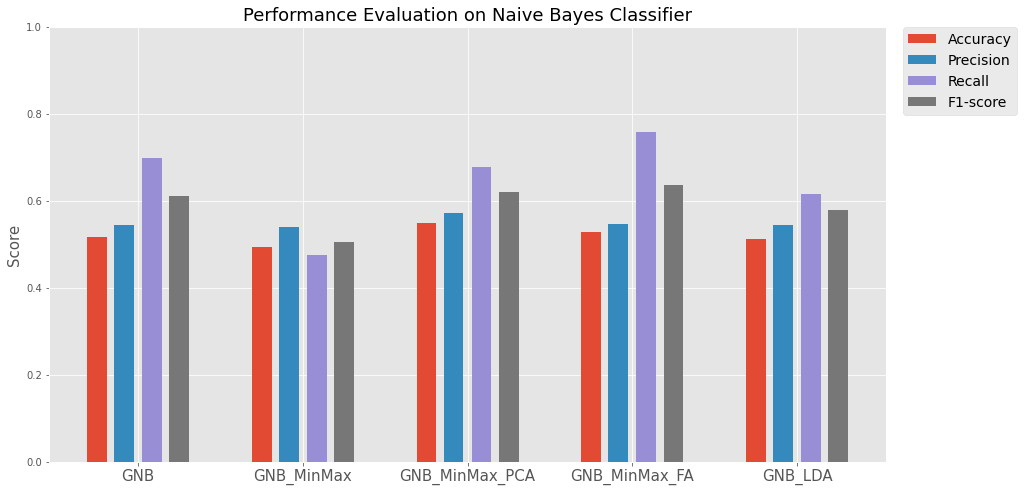

In [61]:
# Plotting chart.
# The Performance comparsion on different combination techniques on Naive Bayes Model.

plt.figure(figsize=(15,8))

x_axis = np.arange(len(model_list))

plt.bar(x_axis -0.25, accuracy, width=0.12, label = 'Accuracy')
plt.bar(x_axis -0.085, precision, width=0.12, label = 'Precision')
plt.bar(x_axis +0.085, recall, width=0.12, label = 'Recall')
plt.bar(x_axis +0.25, fscore, width=0.12, label = 'F1-score')

plt.xticks(x_axis,model_list,fontsize=15)
plt.ylim(0,1)
plt.ylabel('Score',fontsize=15)

plt.title('Performance Evaluation on Naive Bayes Classifier',fontsize=18)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop={'size': 14})
plt.style.use('ggplot')

In [62]:
# Performance comparison table

dict = {'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1-score':fscore }
index = pd.Index(model_list)

evaluation_metric = pd.DataFrame(dict)
evaluation_metric = evaluation_metric.set_index(index)
evaluation_metric.style.background_gradient(cmap='Blues')

,Accuracy,Precision,Recall,F1-score
GNB,0.516484,0.543307,0.696970,0.610619
GNB_MinMax,0.494505,0.540230,0.474747,0.505376
GNB_MinMax_PCA,0.549451,0.572650,0.676768,0.620370
GNB_MinMax_FA,0.527473,0.547445,0.757576,0.635593
GNB_LDA,0.510989,0.544643,0.616162,0.578199


## 3.2) The performance comparison of Predictive modeling

เปรียบเทียบประสิทธิภาพของโมเดล

In [63]:
# List of Model names.
model_list2 = ['Naive Bayes Classifier', 'Decision Tree Classifier', 'MLP Classifier']

In [64]:
# List of evaluation metrics for each model.
accuracy2 = [accuracy_gnb_list[2], accuracy_tree_list_best[0], accuracy_mlp_best[0]]
precision2 = [list_of_metric[2][0][1], list_of_metric_tree_best[0][0][1], list_of_metric_mlp_best[0][0][1]]
recall2 = [list_of_metric[2][1][1], list_of_metric_tree_best[0][1][1], list_of_metric_mlp_best[0][1][1]]
fscore2 = [list_of_metric[2][2][1], list_of_metric_tree_best[0][2][1], list_of_metric_mlp_best[0][2][1]]

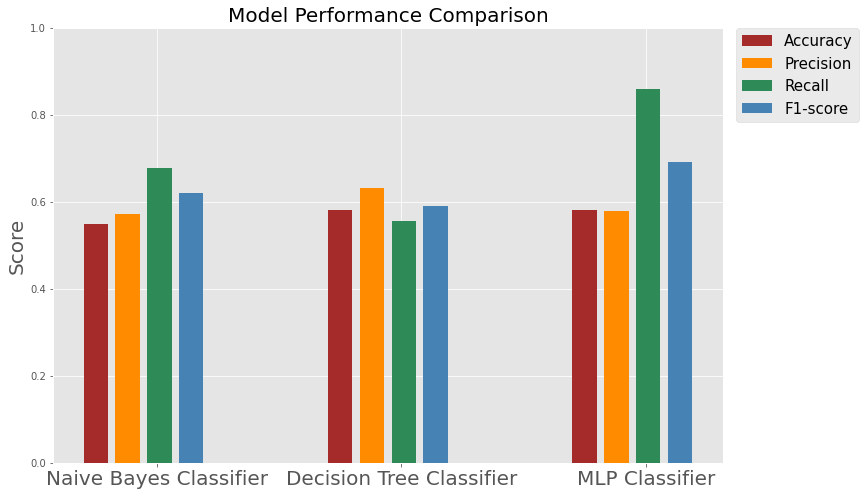

In [65]:
# Plotting chart.
# The Performance comparsion of Predictive Modeling.

plt.figure(figsize=(12,8))

x_axis = np.arange(len(model_list2))

plt.bar(x_axis -0.25, accuracy2, width=0.1, label = 'Accuracy', color='brown')
plt.bar(x_axis -0.12, precision2, width=0.1, label = 'Precision', color='darkorange')
plt.bar(x_axis +0.01, recall2, width=0.1, label = 'Recall', color='seagreen')
plt.bar(x_axis +0.14, fscore2, width=0.1, label = 'F1-score', color='steelblue')

plt.xticks(x_axis,model_list2,fontsize=20)
plt.ylim(0,1)
plt.ylabel('Score',fontsize=20)

plt.title('Model Performance Comparison',fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop={'size': 15})
plt.style.use('ggplot')

In [66]:
# Performance comparison of Predictive Modeling table.

dict = {'Accuracy':accuracy2,'Precision':precision2,'Recall':recall2,'F1-score':fscore2 }
index = pd.Index(model_list2)

evaluation_metric2 = pd.DataFrame(dict)
evaluation_metric2 = evaluation_metric2.set_index(index)
evaluation_metric2.style.background_gradient(cmap='Blues')

,Accuracy,Precision,Recall,F1-score
Naive Bayes Classifier,0.549451,0.572650,0.676768,0.620370
Decision Tree Classifier,0.582418,0.632184,0.555556,0.591398
MLP Classifier,0.582418,0.578231,0.858586,0.691057
